In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\EngagementStudy')

data = pd.read_csv('AdaptiveAdaptive.txt')
data.head(5)

,Unnamed: 0,P1,P12,P13,P16,P17,P19,P20,P21,P24,P25,P28,P29,P4,P5,P8,P9
0,0,0.428302,0.255630,0.437355,0.078434,0.206647,0.333193,0.416275,0.652274,0.529506,0.285456,0.418244,0.492131,0.299160,0.739898,0.441354,0.035160
1,1,0.429636,0.256077,0.435220,0.079887,0.206435,0.333754,0.418508,0.654078,0.531659,0.284193,0.418955,0.491004,0.292584,0.740205,0.443494,0.035858
2,2,0.430734,0.256140,0.432995,0.081416,0.206293,0.334455,0.420587,0.655826,0.534131,0.283050,0.419382,0.489675,0.285295,0.740205,0.445633,0.036555
3,3,0.431676,0.256332,0.430949,0.082945,0.206222,0.335156,0.422665,0.657686,0.536842,0.281846,0.419880,0.488226,0.277214,0.739693,0.447772,0.037310
4,4,0.432068,0.256395,0.428991,0.084474,0.206151,0.336137,0.424744,0.659602,0.539314,0.280582,0.420094,0.486696,0.268658,0.738517,0.449633,0.038008


# DFA

## Mean Centering the Data

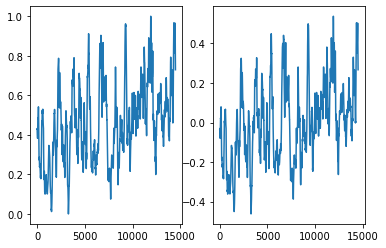

In [5]:

p1 = np.array(data['P1'])

plt.plot(figsize = (15,15))
plt.subplot(1,2,1)
plt.plot(p1)

plt.subplot(1,2,2)
p1_centered = p1 - np.mean(p1)
plt.plot(p1_centered)

## Cumulative Sum

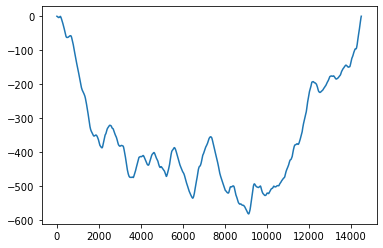

In [6]:

cumulative = np.cumsum(p1_centered)
plt.plot(cumulative)

## Defining Scales in Logspace

Text(0, 0.5, 'epoch length (s)')

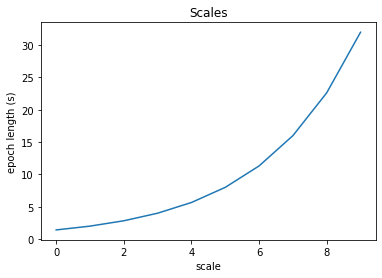

In [95]:
#our epochs will be this long
scales = np.logspace(0.5, 5, num=10, base=2)

plt.plot(scales)
plt.title('Scales')
plt.xlabel('scale')
plt.ylabel('epoch length (s)')

## Cutting Data into Epochs

In [69]:
#sample freq = 256
#This function determines in how many epochs the data should be split based on the time window

    

Text(0, 0.5, 'Amplitude')

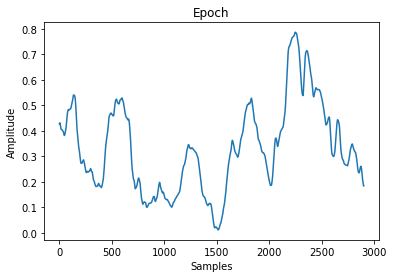

In [161]:

#getScales and getParticipant return a list of eeg signals split into detrended epochs

def getSplit(data, epoch_sec):
    duration = data.shape[0]
    epoch = 250*epoch_sec
    
    division = int(duration/epoch)
    return division
    

def getScales(data, scale):
    return np.array_split(p1,(getSplit(p1,scales[scale])))


def getParticipant(data):
    out = []


    for i in range(len(scales)):
        out.append(getScales(data,i))
       
    arr = np.array(out, dtype = object)
      
        
    return arr


p1_scales = getParticipant(p1)


scalenum = 6 
window = 0

plt.plot(p1_scales[scalenum][window]) #change here to 1) scale, 2) the Nth window in that scale
plt.title('Epoch')
plt.xlabel('Samples')
plt.ylabel('Amplitude')


In [169]:
print(len(p1_scales[2]))
#scale 0 has 41 windows
#scale 1 has 29
#scale 2 has 20 
#and so on...

20


## Detrending the signal

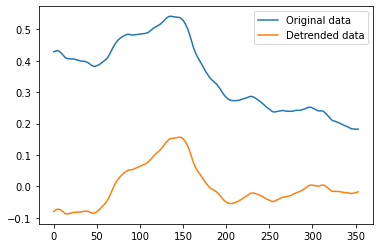

In [100]:
import numpy as np

# Detrend the data using scipy.signal.detrend
detrended_data = signal.detrend(p1_scales[0][0])

# Plot the original and detrended data
import matplotlib.pyplot as plt
plt.plot(p1_scales[0][0], label="Original data")

plt.legend()
plt.show()

## RMS and Detrend

Text(0.5, 1.0, 'Detrended')

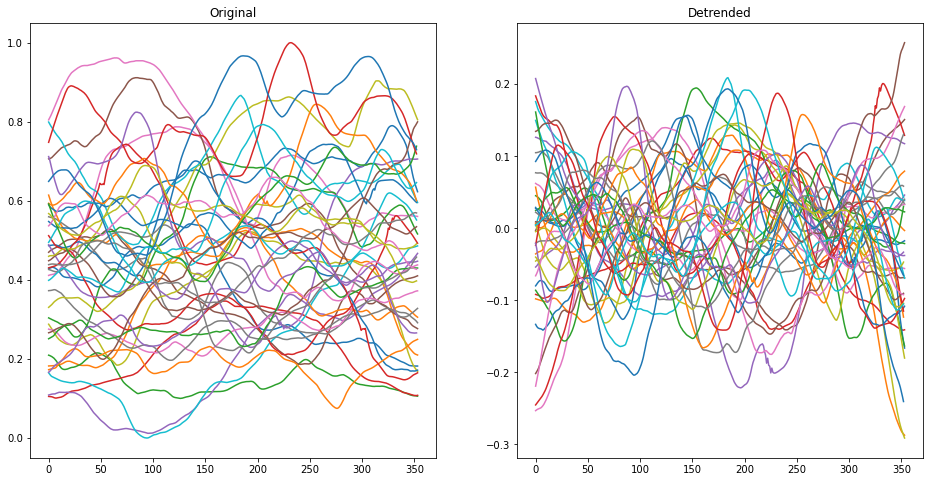

In [176]:
scale = 0

plt.figure(figsize = (16,8))
plt.subplot(1,2,1)

for i in range(len(p1_scales[scale])):
    plt.plot(p1_scales[scale][i], label="Original data")
    
plt.title('Original')
    
plt.subplot(1,2,2)


for i in range(len(p1_scales[scale])):
    detrended_data = signal.detrend(p1_scales[scale][i])
    
    plt.plot(detrended_data, label="Detrended data")
    
plt.title('Detrended')

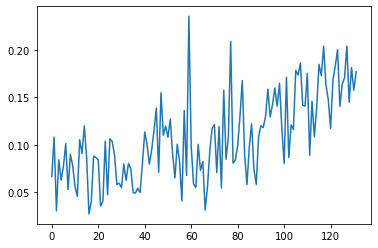

In [178]:
rms = []
def RMS(data):
    return np.sqrt(np.mean(data**2))

for scale in range(10):
    for i in range(len(p1_scales[scale])):
        detrended_data = signal.detrend(p1_scales[scale][i])
        rms.append(RMS(detrended_data))
        
plt.plot(rms)

## Linear Fit RMS and Logspace

In [181]:
print(len(rms))
print(len(scales))

132
10


Fit coefficients: [0.00374578 0.07062653]


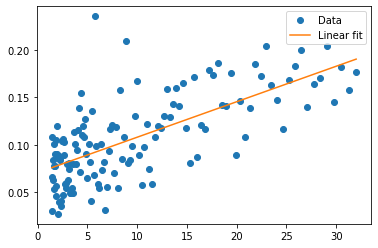

In [189]:

# Generate some sample data
x = np.logspace(0.5, 5, num=132, base=2)
y = rms 

# Perform linear fit using numpy.polyfit
fit_coeffs = np.polyfit(x, y, 1)  # fit a first-order (linear) polynomial

# Print the fit coefficients (slope and intercept)
print("Fit coefficients:", fit_coeffs)

# Calculate the fitted values
fit_values = np.polyval(fit_coeffs, x)

# Plot the data and the linear fit
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label="Data")
plt.plot(x, fit_values, label="Linear fit")
plt.legend()
plt.show()